# **Algoritma *K-Means***

## **Pengertian K-Means Clustering**

Algoritma K-Means Clustering adalah salah satu metode unsupervised machine learning yang digunakan untuk mengelompokkan data ke dalam K cluster berdasarkan kemiripan atau kedekatan karakteristiknya. Tujuannya adalah meminimalkan variasi dalam setiap cluster (within-cluster variation) dan memaksimalkan perbedaan antar cluster.

## **Inersia**
Algoritma k-means clustering bertujuan untuk memilih centroid, atau pusat kluster, yang meminimalkan inersia, sebuah metrik evaluasi yang mengukur seberapa baik sebuah kumpulan data dikelompokkan berdasarkan metrik jarak. Inersia dihitung dengan mengukur jarak antara titik data dan pusatnya, mengkuadratkan jarak tersebut dan menjumlahkan kuadrat tersebut untuk setiap titik data dalam kluster.

Inertia didefinisikan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

## **Silhouette analysis**

Silhouette Analysis adalah metode evaluasi kualitas clustering yang mengukur seberapa baik suatu data point cocok dengan clusternya (cohesion) dibandingkan dengan cluster lain (separation). Analisis ini membantu menentukan:

- jumlah cluster (K) yang dipilih optimal.

- data point telah ditempatkan di cluster yang tepat.

Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## **Silhouette Analysis**

Silhouette merupakan metrik untuk mengevaluasi kinerja algoritma pengelompokan. Skor ini menggunakan kekompakan klaster individual ( jarak intra klaster ) dan pemisahan antar klaster ( jarak inter klaster ) untuk mengukur skor representatif keseluruhan tentang seberapa baik kinerja algoritma pengelompokan kami.

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

**Penjelasan Notasi**:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data

## Implementasi dengan menggunakan data Iris

In [1]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.9 MB/s eta 0:00:00


## Library yang digunakan

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## Ambil dan Gabungkan Data dari Database

In [5]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-2ac2cab5-postgresqlll.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_ZZ2Nug85jAxr0Snylw5",
        database="defaultdb",
        port=21381
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM faruqqq.postgree")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-22b75224-mmysql.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_7Nf-SiZjwaL2z2c9ohx",
        database="defaultdb",
        port=21815
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()
df_postgresql = df_postgresql.rename(columns={'Class': 'class'})

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal length  sepal width
  1     Iris-setosa          98.7         89.0           5.1          3.5
  2     Iris-setosa         105.1         95.0           4.9          3.0
  3     Iris-setosa         112.3         99.0           4.7          3.2
  4     Iris-setosa         103.0         99.0           4.6          3.1
  5     Iris-setosa         109.0        104.0           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## Data sebelum di normalisasi

Berikut adalah data asli sebelum normalisasi

In [6]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal_length  petal_width  sepal length  sepal width
         98.7         89.0           5.1          3.5
        105.1         95.0           4.9          3.0
        112.3         99.0           4.7          3.2
        103.0         99.0           4.6          3.1
        109.0        104.0           5.0          3.6
          1.7          0.4           5.4          3.9
          1.4          0.3           4.6          3.4
          1.5          0.2           5.0          3.4
          1.4          0.2           4.4          2.9
          1.5          0.1           4.9          3.1
          1.5          0.2           5.4          3.7
          1.6          0.2           4.8          3.4
          1.4          0.1           4.8          3.0
          1.1          0.1           4.3          3.0
          1.2          0.2           5.8          4.0
          1.5          0.4           5.7          4.4
          1.3          0.4           5.4          3.9
          1.4          0.3  

## Visualisasi data

### Visualisasi data asli tanpa menggunakan PCA

Berikut adalah Diagaram visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

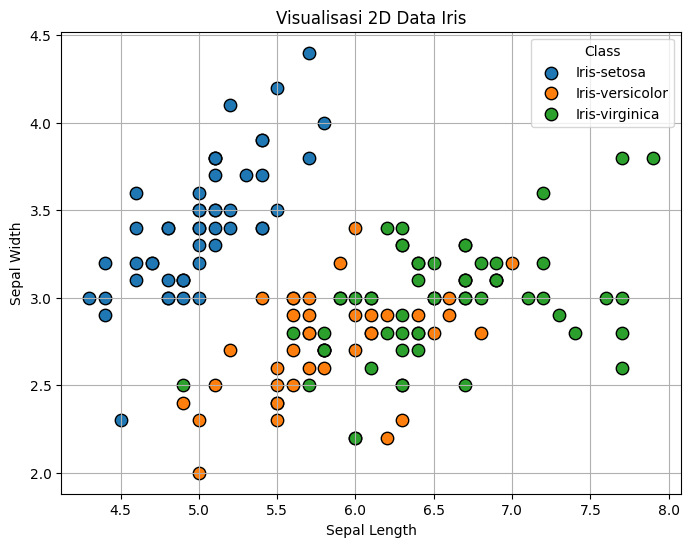

In [8]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal length'], subset['sepal width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


Ini adalah Diagram visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

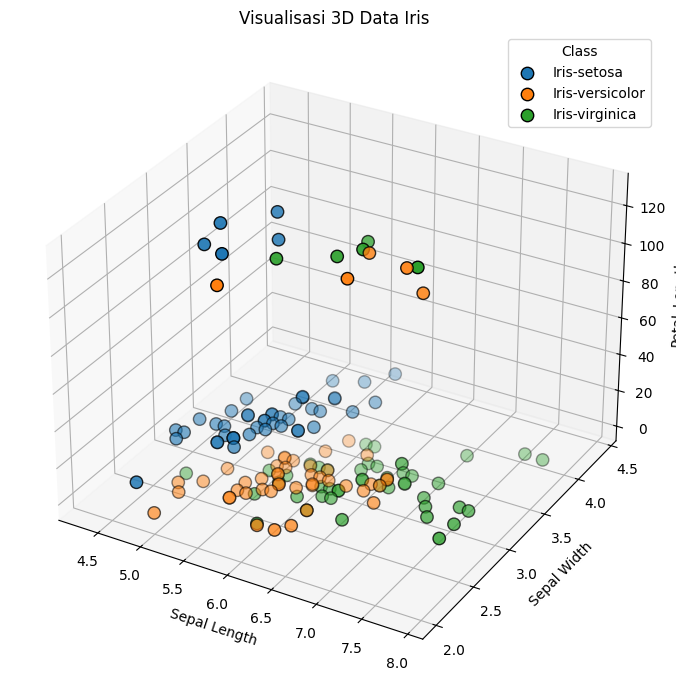

In [10]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal length'],
        subset['sepal width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal_Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

Ini adalah Diagram visualisasi data Iris secara 2 Dimensi menggunakan PCA

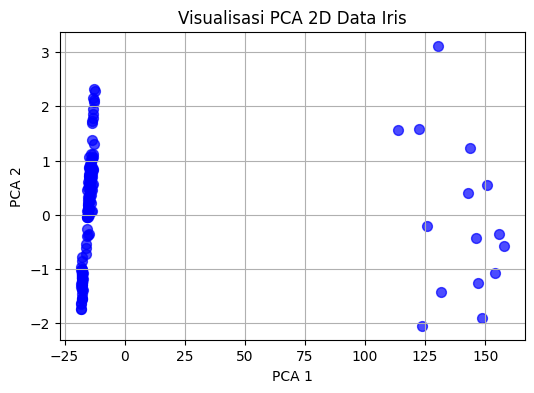

In [11]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Ini adalah Diagram visualisasi data Iris secara 3 Dimensi menggunakan PCA

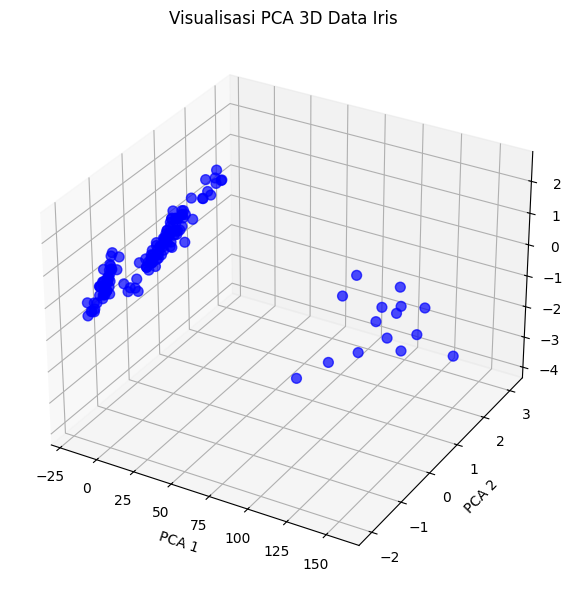

In [12]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Preprocessing dan Reduksi Dimensi

### Standarisasi dengan menggunakan MinMaxScaler

Dalam proses ini, saya juga menerapkan normalisasi menggunakan MinMaxScaler untuk menyelaraskan skala seluruh fitur dalam dataset. Hal ini menjadi langkah penting karena setiap fitur memiliki rentang nilai yang berbeda, yang dapat memengaruhi efektivitas model machine learning—terutama pada algoritma yang bergantung pada perhitungan jarak seperti KNN dan SVM.

MinMaxScaler bekerja dengan mengubah nilai-nilai dalam setiap fitur ke skala antara 0 hingga 1, berdasarkan nilai minimum dan maksimum dari fitur tersebut. Penyamaan skala ini memungkinkan algoritma memproses tiap fitur secara seimbang tanpa memberikan bobot lebih pada fitur dengan nilai yang lebih tinggi.

Setelah normalisasi diterapkan, saya melihat adanya peningkatan stabilitas dan performa model. Dari pengalaman ini, saya menyadari bahwa normalisasi bukan hanya sekadar prosedur teknis, melainkan juga bagian krusial dalam menjaga kualitas dan keandalan data yang digunakan dalam pembelajaran mesin.

In [13]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [14]:
print (scaled_features);

[[7.71112865e-01 7.28091728e-01 2.22222222e-01 6.25000000e-01]
 [8.21625888e-01 7.77231777e-01 1.66666667e-01 4.16666667e-01]
 [8.78453039e-01 8.09991810e-01 1.11111111e-01 5.00000000e-01]
 [8.05051302e-01 8.09991810e-01 8.33333333e-02 4.58333333e-01]
 [8.52407261e-01 8.50941851e-01 1.94444444e-01 6.66666667e-01]
 [5.52486188e-03 2.45700246e-03 3.05555556e-01 7.91666667e-01]
 [3.15706393e-03 1.63800164e-03 8.33333333e-02 5.83333333e-01]
 [3.94632991e-03 8.19000819e-04 1.94444444e-01 5.83333333e-01]
 [3.15706393e-03 8.19000819e-04 2.77777778e-02 3.75000000e-01]
 [3.94632991e-03 0.00000000e+00 1.66666667e-01 4.58333333e-01]
 [3.94632991e-03 8.19000819e-04 3.05555556e-01 7.08333333e-01]
 [4.73559590e-03 8.19000819e-04 1.38888889e-01 5.83333333e-01]
 [3.15706393e-03 0.00000000e+00 1.38888889e-01 4.16666667e-01]
 [7.89265983e-04 0.00000000e+00 0.00000000e+00 4.16666667e-01]
 [1.57853197e-03 8.19000819e-04 4.16666667e-01 8.33333333e-01]
 [3.94632991e-03 2.45700246e-03 3.88888889e-01 1.000000

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Disini saya melakukan clustering menggunakan K-Means dengan 2 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 12.9506, Silhouette Score: 0.7173


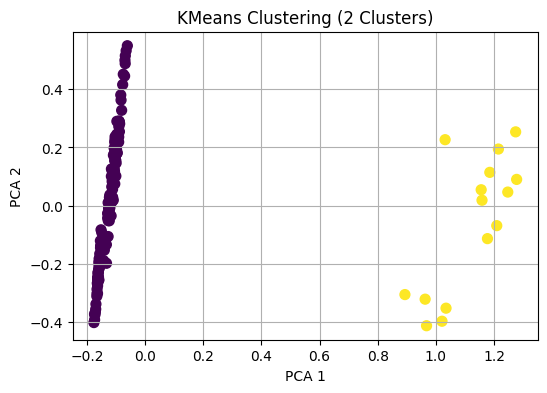

In [15]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 12.9506, Silhouette Score: 0.7173


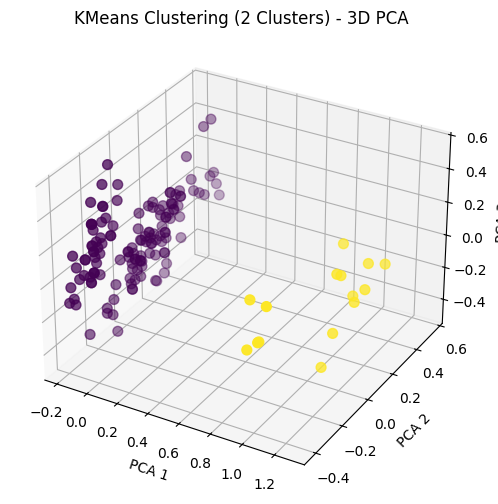

In [16]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Berikut saya melakukan clustering menggunakan K-Means dengan 3 cluster sekaligus menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 7.7064, Silhouette Score: 0.4565


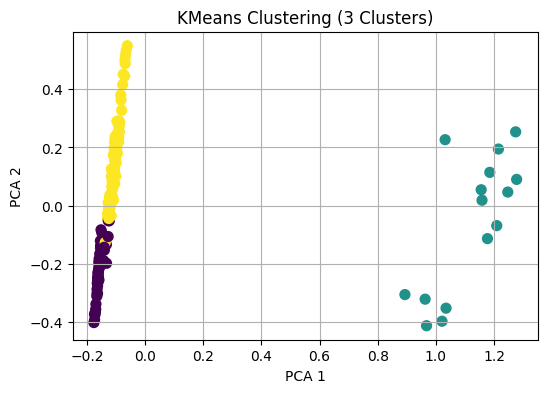

In [17]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 7.7064, Silhouette Score: 0.4565


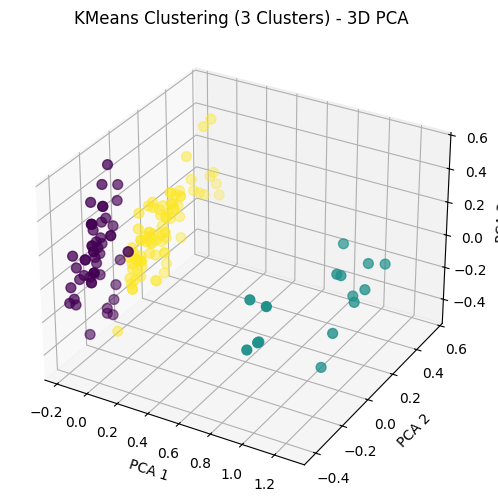

In [18]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Berikut saya melakukan clustering menggunakan K-Means dengan 4 cluster sekaligus, menghitung Inertia dan Silhouette Score, lalu melakukan visualisasi 2 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 5.1428, Silhouette Score: 0.4630


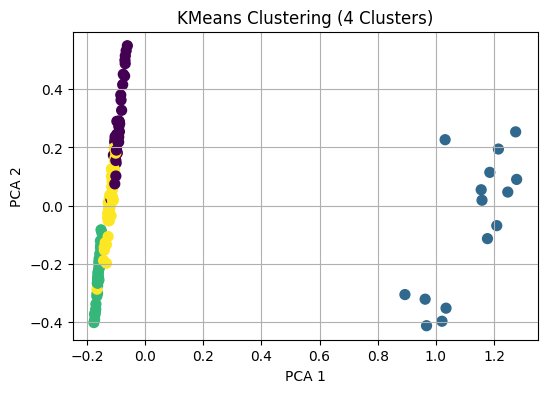

In [19]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 5.1428, Silhouette Score: 0.4630


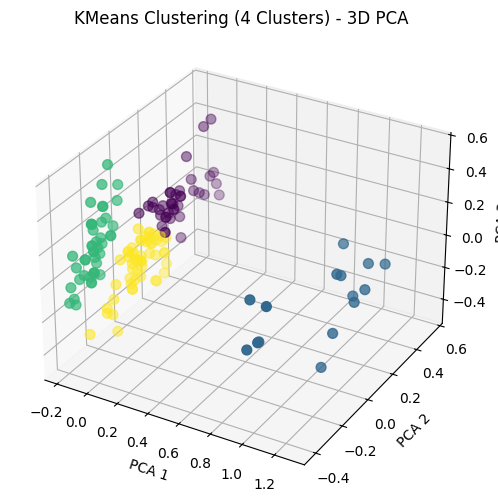

In [20]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
